In [12]:
# rich output 출력위치 설정
# => 웹 브라우저에서 바로 봄
get_ipython().run_line_magic('matplotlib', 'inline')

# 색상 출력
# 설치 방법 => pip install termcolor
from termcolor import colored
def c(tag, data, under=3):

    val = colored(tag + ':\n', 'magenta', attrs=['bold'])
    t = type(data)
    val += colored(t, 'magenta')
    under = str(under)
    
    import numpy
    if t is float or t is numpy.float64:
        val += ('\n{:.' + under + 'f}\n').format(data)
    else:
        val += '\n{}\n'.format(data)
    return val

#### <span style="color:#184;background:#EEE">2.3.2. k-최근접 이웃</span><br>

- 가장 간단한 머신러닝 알고리즘
- 데이터 셋을 저장하는 것이 학습 알고리즘의 전부
- 분류/회귀 모두에 쓰임<br><br>

- **<span style="color:#C22">분류 알고리즘</span>**
    1. 가장 이웃한 데이터를 n_neighbors만큼 선택
    2. 가장 많이 선택된 클래스를 정답으로 예측

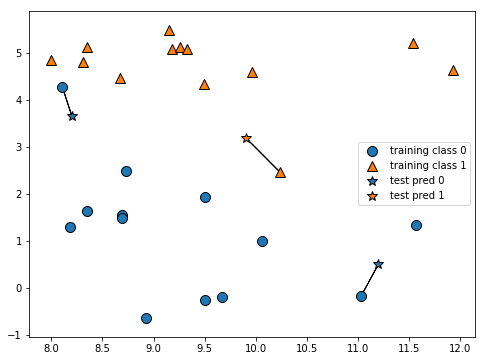

In [13]:
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import mglearn

# k-최근접 이웃 분류 n_neighbors=1
plt.figure(figsize=(8, 6))
mglearn.plots.plot_knn_classification(n_neighbors=1) # 체험용

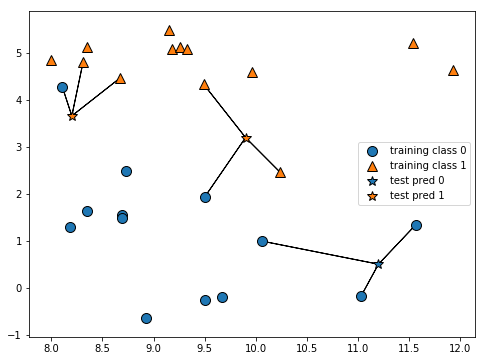

In [14]:
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import mglearn

# k-최근접 이웃 분류 n_neighbors=3
plt.figure(figsize=(8, 6))
mglearn.plots.plot_knn_classification(n_neighbors=3) # 체험용

In [15]:
# scikit-learn에서 구현하고 평가하기

import sys
sys.path.append('..')
import mglearn

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(c('X_train shape', X_train.shape))
print(c('y_train shape', y_train.shape))
print(c('X_test shape', X_test.shape))
print(c('y_test shape', y_test.shape))

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(c('test set predictions', y_pred))
print(c('test set targets', y_test))
print(c('train set score', clf.score(X_train, y_train)))
print(c('test set score', clf.score(X_test, y_test)))

X_train shape:
<class 'tuple'>
(19, 2)

y_train shape:
<class 'tuple'>
(19,)

X_test shape:
<class 'tuple'>
(7, 2)

y_test shape:
<class 'tuple'>
(7,)

test set predictions:
<class 'numpy.ndarray'>
[1 0 1 0 1 0 0]

test set targets:
<class 'numpy.ndarray'>
[1 0 1 0 1 1 0]

train set score:
<class 'numpy.float64'>
0.947

test set score:
<class 'numpy.float64'>
0.857



- 결정경계(decision boundary) 확인
    - **n_neighbors가 커질수록 부드러운 경계가 생성됨**<br><br>
    
- 정확도(accuracy) 비교
    - 그래프에 따르면 n_neighbors가 6일 때 최적

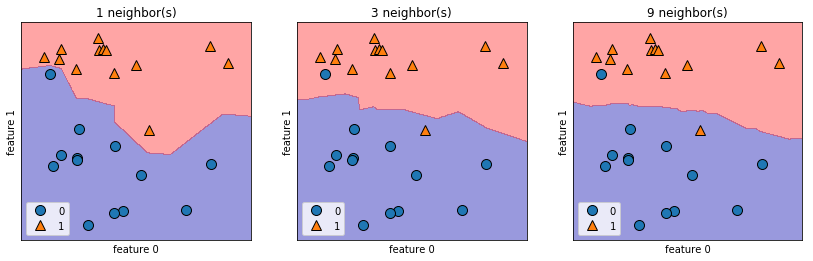

In [16]:
# n_neighbors 값에 따른 결정경계 확인해보기

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sys
sys.path.append("..")
import mglearn

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for n_neighbors, ax in zip([1, 3, 9], axes):
    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
    
axes[0].legend(loc=3)
axes[1].legend(loc=3)
axes[2].legend(loc=3)

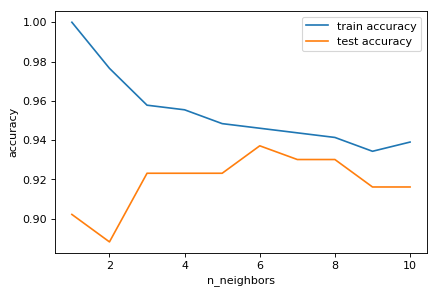

In [17]:
# n_neighbors 값에 따른 정확도 확인해보기

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, 
    cancer.target, 
    stratify=cancer.target, 
    random_state=66
)

train_accuracy = []
test_accuracy = []

# 1 ~ 10 neighbors value
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # 정확도 저장
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.figure(figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(neighbors_settings, train_accuracy, label='train accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

- **<span style="color:#C22">회귀 알고리즘</span>**
    1. 가장 이웃한 데이터를 n_neighbors만큼 선택
    2. 평균(average or mean)을 예측값으로 지정

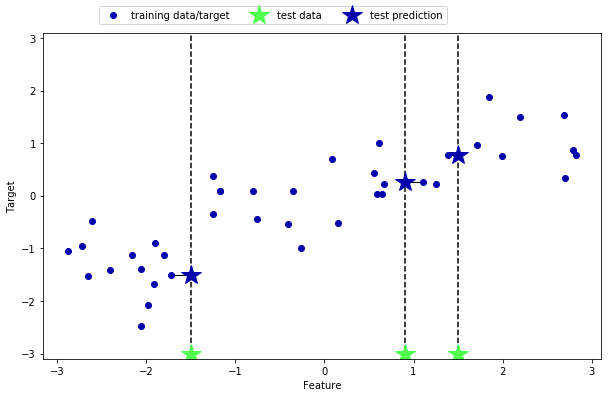

In [18]:
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import mglearn

# k-최근접 이웃 회귀 n_neighbors=1
plt.figure(figsize=(8, 6))
mglearn.plots.plot_knn_regression(n_neighbors=1) # 체험용

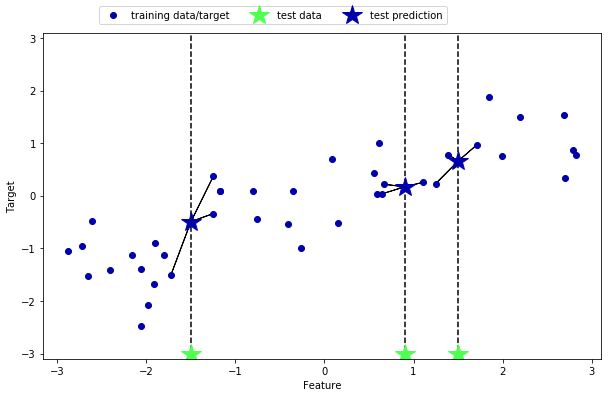

In [19]:
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import mglearn

# k-최근접 이웃 회귀 n_neighbors=3
plt.figure(figsize=(8, 6))
mglearn.plots.plot_knn_regression(n_neighbors=3) # 체험용

- **회귀 알고리즘에서 score는 결정 계수라고 하는 R^2을 사용**
- 예측의 적합도를 0과 1 사이의 값으로 계산

In [20]:
# scikit-learn에서 구현하고 평가하기

import sys
sys.path.append('..')
import mglearn

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(c('test set predictions', y_pred))
print(c('test set targets', y_test))
print(c('train set score', reg.score(X_train, y_train)))
print(c('test set score', reg.score(X_test, y_test)))

test set predictions:
<class 'numpy.ndarray'>
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]

test set targets:
<class 'numpy.ndarray'>
[ 0.37299129  0.21778193  0.96695428 -1.38773632 -1.05979555 -0.90496988
  0.43655826  0.7789638  -0.54114599 -0.95652133]

train set score:
<class 'numpy.float64'>
0.819

test set score:
<class 'numpy.float64'>
0.834



- 분석하기
    - **n_neighbors가 커질수록 안정된 예측이 가능**

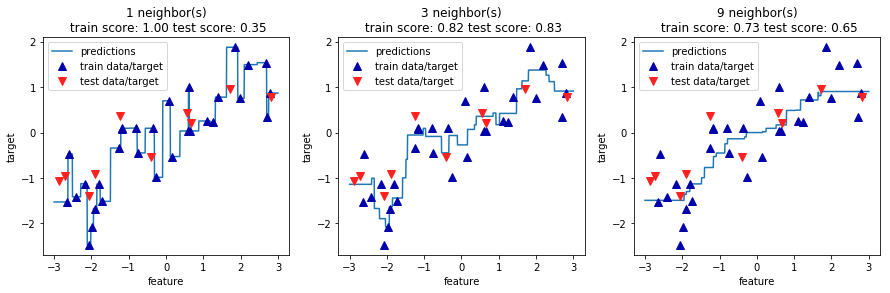

In [21]:
# n_neighbors 값에 따른 곡선의 모양을 확인해보기

import sys
sys.path.append('..')
import mglearn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# -3과 3 사이의 1000개의 연속적인 예측을 위한 데이터 포인트 생성
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for n_neighbors, ax in zip([1, 3, 9], axes):
    
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
    ax.set_title('{} neighbor(s)\n train score: {:.2f} test score: {:.2f}'.format(
        n_neighbors,
        reg.score(X_train, y_train),
        reg.score(X_test, y_test)))
    
axes[0].legend(['predictions', 'train data/target', 'test data/target'], loc='best')
axes[1].legend(['predictions', 'train data/target', 'test data/target'], loc='best')
axes[2].legend(['predictions', 'train data/target', 'test data/target'], loc='best')

- **<span style="color:#C22">장단점과 매개변수</span>**<br><br>

    - **강점**
        1. 이해하기 쉬움
        2. 많은 조정작업 없이도 성능이 괜찮음
        3. 복잡한 알고리즘을 적용하기 전에 시도해볼만 함<br><br>
    
    - **약점**
        1. 훈련데이터가 너무 많으면 성능이 저하됨
        2. 수백개 이상의 많은 특성을 가진 데이터셋은 적용하기 어려움
        3. 특성값 대부분이 0인 희소 데이터셋도 적용하기 어려움
        4. 데이터 전처리 작업이 중요함 (3장 내용)<br><br>
        
        
- <span style="color:#C22">모델이 직접 학습하는 파라미터</span> - 모델 파라미터, 계수(coefficient), 가중치(weight)
- <span style="color:#C22">모델이 학습할 수 없는 파라미터</span> - 하이퍼파라미터(hyperparameter), 또는 매개변수